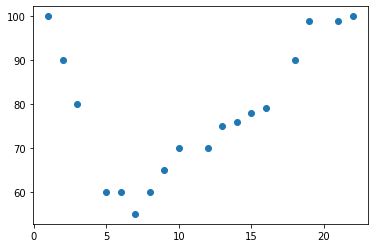

In [1]:
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

plt.scatter(x, y)
plt.show()

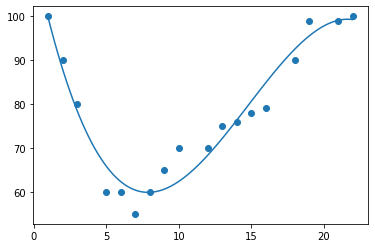

In [2]:
import numpy
import matplotlib.pyplot as plt

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3)) # 三阶。 numpy.poly1d建立多项式模型：

myline = numpy.linspace(1, 22, 100) # 产生1到22的100个点

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))# 画出多项式回归线
plt.show()

## 案例

In [3]:
# 导入相关库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 读取数据集
dataset = pd.read_csv('Salaries.csv') 
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
X = dataset.iloc[:, 1:-1].values # 自变量（特征）
y = dataset.iloc[:, -1].values # 目标变量（标签）

### 训练

In [5]:
from sklearn.linear_model import LinearRegression # 导入线性回归模型
lin_reg = LinearRegression() # 实例化模型
lin_reg.fit(X, y) # 训练（拟合）
# 输出表明线性回归模型已经在整个数据集上进行了训练。

LinearRegression()

In [7]:
from sklearn.preprocessing import PolynomialFeatures #导入多项式回归模型
poly_regr = PolynomialFeatures(degree = 4) # 四阶
X_poly = poly_regr.fit_transform(X) # 将特征转换为多项式形式
lin_reg_2 = LinearRegression() # 创建模型
lin_reg_2.fit(X_poly, y)
# 输出表明多项式回归模型已在整个数据集上进行了训练。

LinearRegression()

### 可视化

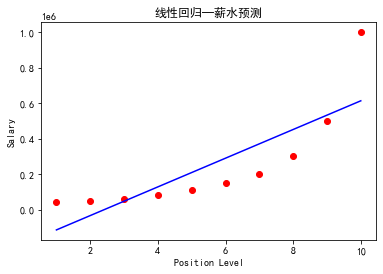

In [8]:
# 线性回归可视化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 支持中文
plt.scatter(X, y, color = 'red') #绘制训练集
plt.plot(X, lin_reg.predict(X), color = 'blue') # 绘制线性回归线
plt.title('线性回归—薪水预测')
plt.xlabel('Position Level') # 添加横坐标的标签
plt.ylabel('Salary') #  添加纵坐标的标签
plt.show() 
# 线性回归模型不能很好地拟合数据。

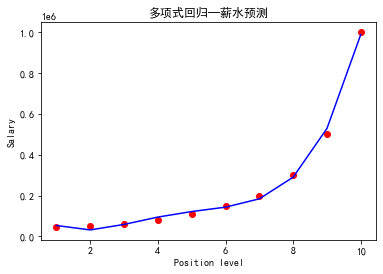

In [9]:
# 多项式回归可视化
plt.scatter(X, y, color = 'red') #绘制训练集
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue') # 绘制多项式回归线
plt.title('多项式回归—薪水预测')
plt.xlabel('Position level') 
plt.ylabel('Salary') 
plt.show() 

## 预测

In [10]:
# 使用线性回归进行新的结果预测。我们使用线性回归模型预测一个新的输出
lin_reg.predict([[6.5]]) 
# 它实际上超出了预期的工资几乎两倍。这表明线性回归不适用于这个问题。

array([330378.78787879])

In [11]:
# 使用多项式回归进行新的结果预测。我们使用多项式回归模型预测新的输出
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
# 执行上面的代码会返回预测工资为 158862.45265155。这个值在我们的预期范围内，因此我们可以得出结论，多项式回归适合这个问题。

array([158862.45265155])